#  Etape 1: Importation des librairies et chargement de fichier

## 1-1: Importation des librairies

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 2-1: Chargement de fichier

In [54]:
# charger le fichier
Les_billets = pd.read_csv('billets.csv', sep=';')

In [55]:
# un aperçu sur les données
Les_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Etape 2: Analyses exploratoires

In [56]:
# Des informations sur le fichier
Les_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [57]:
# Identifier les valeurs manquantes
Les_billets.isnull().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,37
margin_up,0
length,0


# Etape 3: Analyses descriptives

In [58]:
# Analyse statistique
Les_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


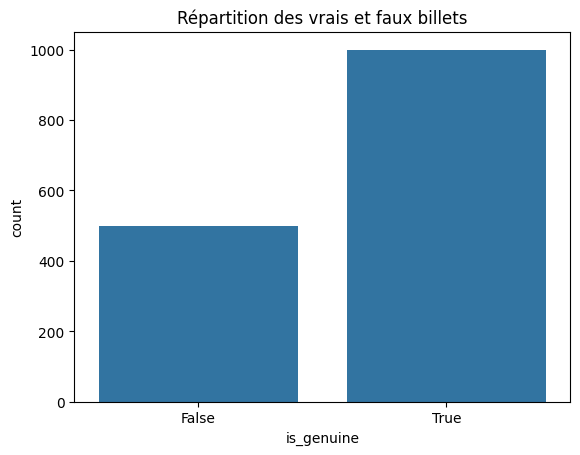

In [59]:
# Répartition des vrais et faux billets
sns.countplot(x='is_genuine', data=Les_billets)
plt.title('Répartition des vrais et faux billets')
plt.show()

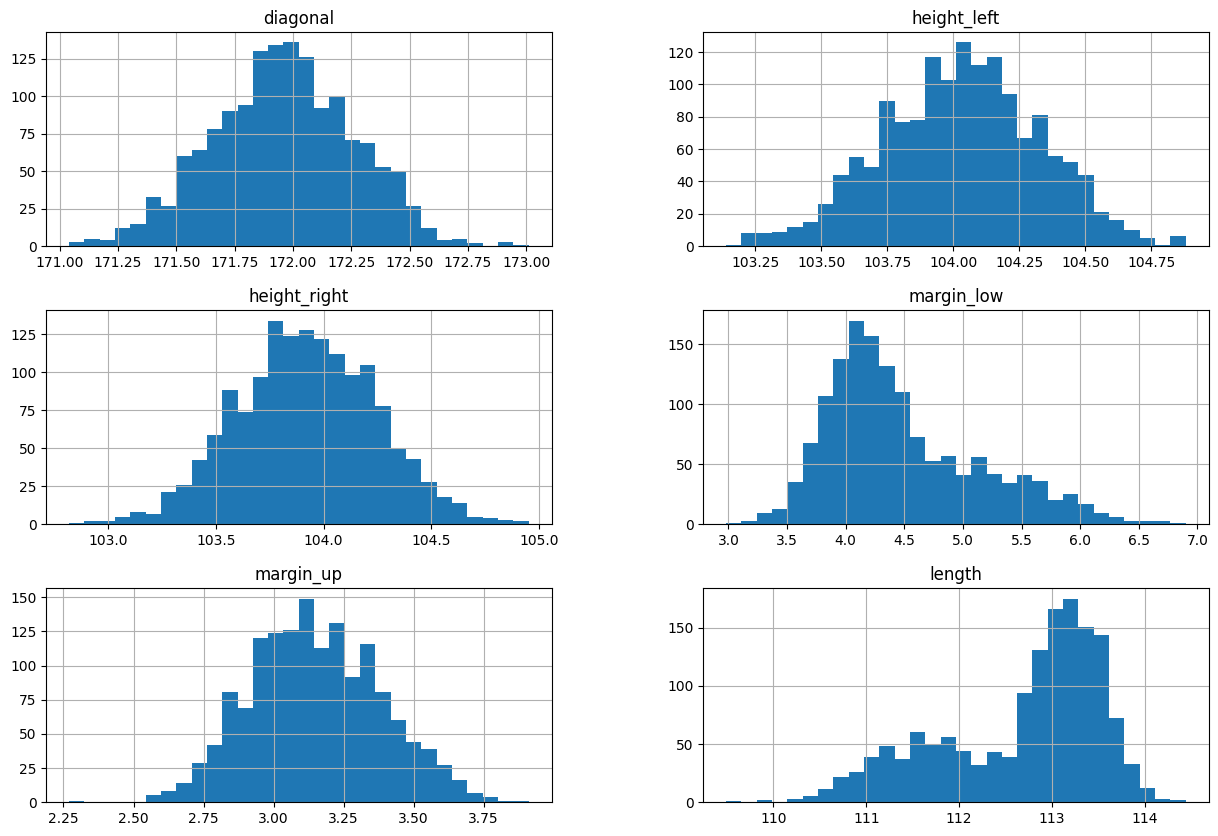

In [60]:
# Histogrammes des caractéristiques géométriques
Les_billets.drop(columns=['is_genuine']).hist(bins=30, figsize=(15, 10))
plt.show()

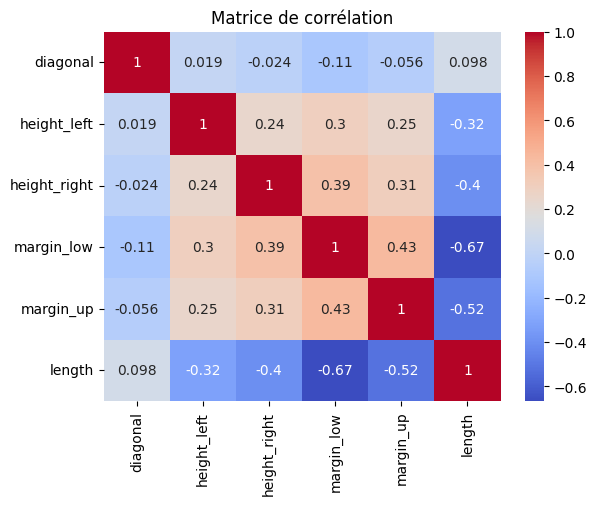

In [61]:
# Analyse bivariée
# Matrice de corrélation
correlation_matrix = Les_billets.drop(columns=['is_genuine']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [62]:
# Analyse bivariée
# Liste des variables quantitatives
quantitative_vars = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']

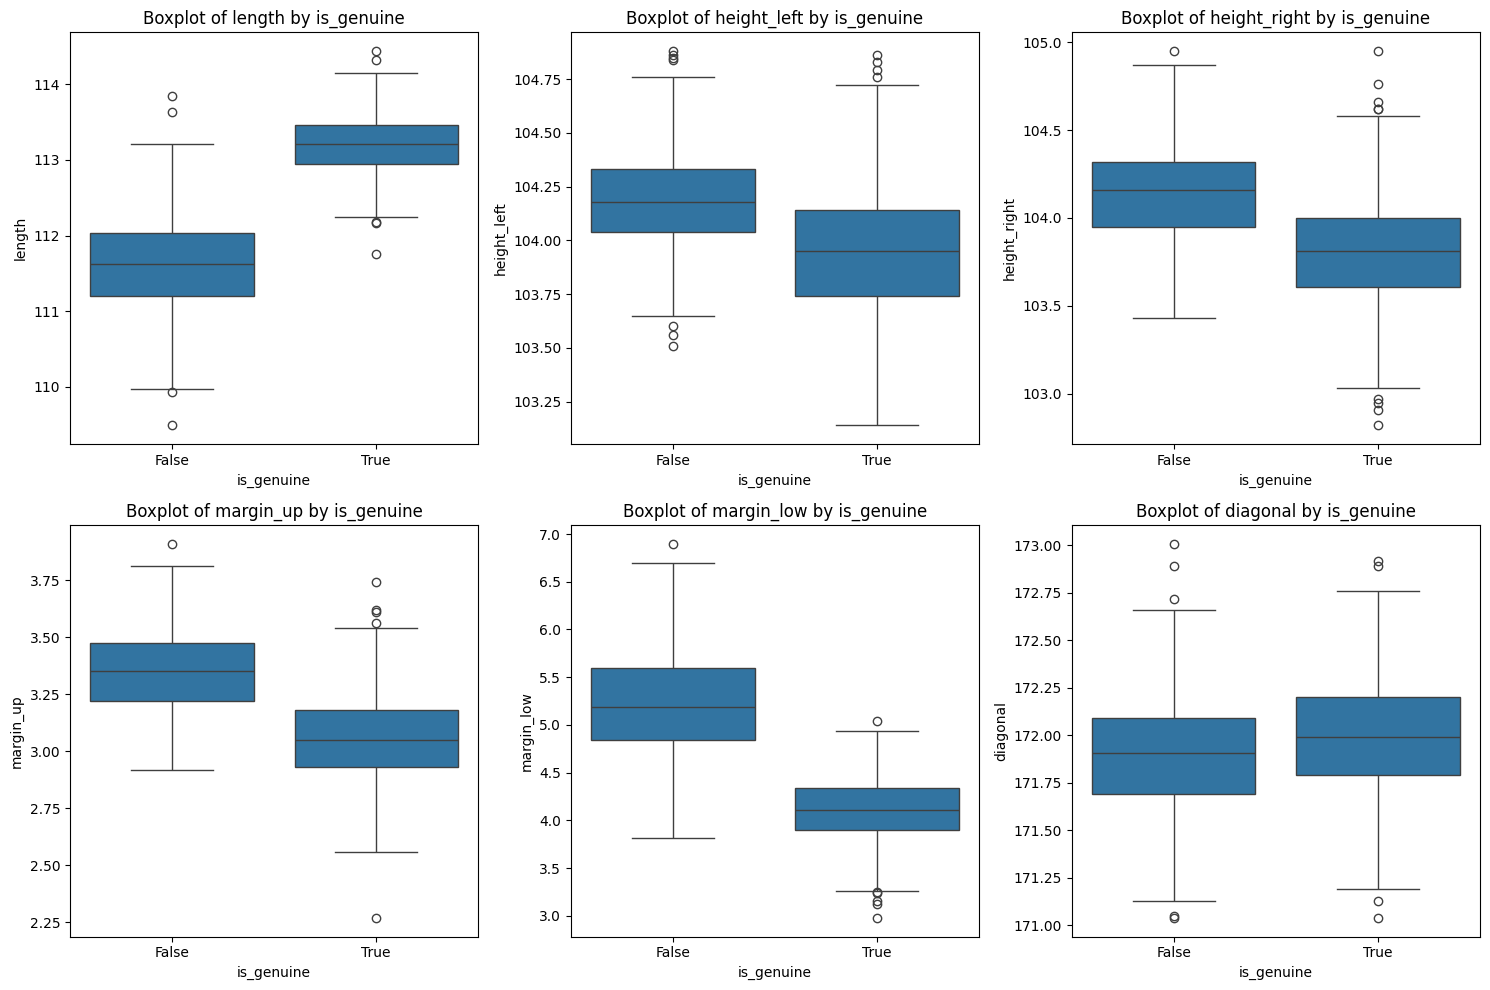

In [63]:
# Créer des boxplots pour chaque variable quantitative en fonction de 'is_genuine'
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_genuine', y=var, data=Les_billets)
    plt.title(f'Boxplot of {var} by is_genuine')
plt.tight_layout()
plt.show()

# Etape 4: Les algorithmes

# 4-1: La régression linéaire

In [64]:
# séparer les données complètes et incomplètes
complete_data = Les_billets.dropna()
incomplete_data = Les_billets[Les_billets.isnull().any(axis=1)]

In [65]:
# entrainer le modéle de régression linéaire sur les données complètes
# définir les features et la cible
features = complete_data.drop(columns=['margin_low', 'is_genuine'])
target = complete_data['margin_low']

In [66]:
# entrainer le model de régression linéaire
model = LinearRegression()
model.fit(features, target)

LinearRegression()

In [67]:
# utiliser ce model pour prédire les valeurs manquantes
incomplete_features = incomplete_data.drop(columns=['margin_low', 'is_genuine'])
predictions = model.predict(incomplete_features)

In [68]:
# combler les valeurs manquantes avec les prédictions
Les_billets.loc[Les_billets['margin_low'].isnull(), 'margin_low'] = predictions

In [69]:
Les_billets.isnull().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,0
margin_up,0
length,0


In [70]:
# Vérification des types de données et conversion en numérique
X = Les_billets.drop(columns=['margin_low', 'is_genuine'])
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)  # Ajout de la constante pour le modèle statsmodels
y = Les_billets['margin_low']

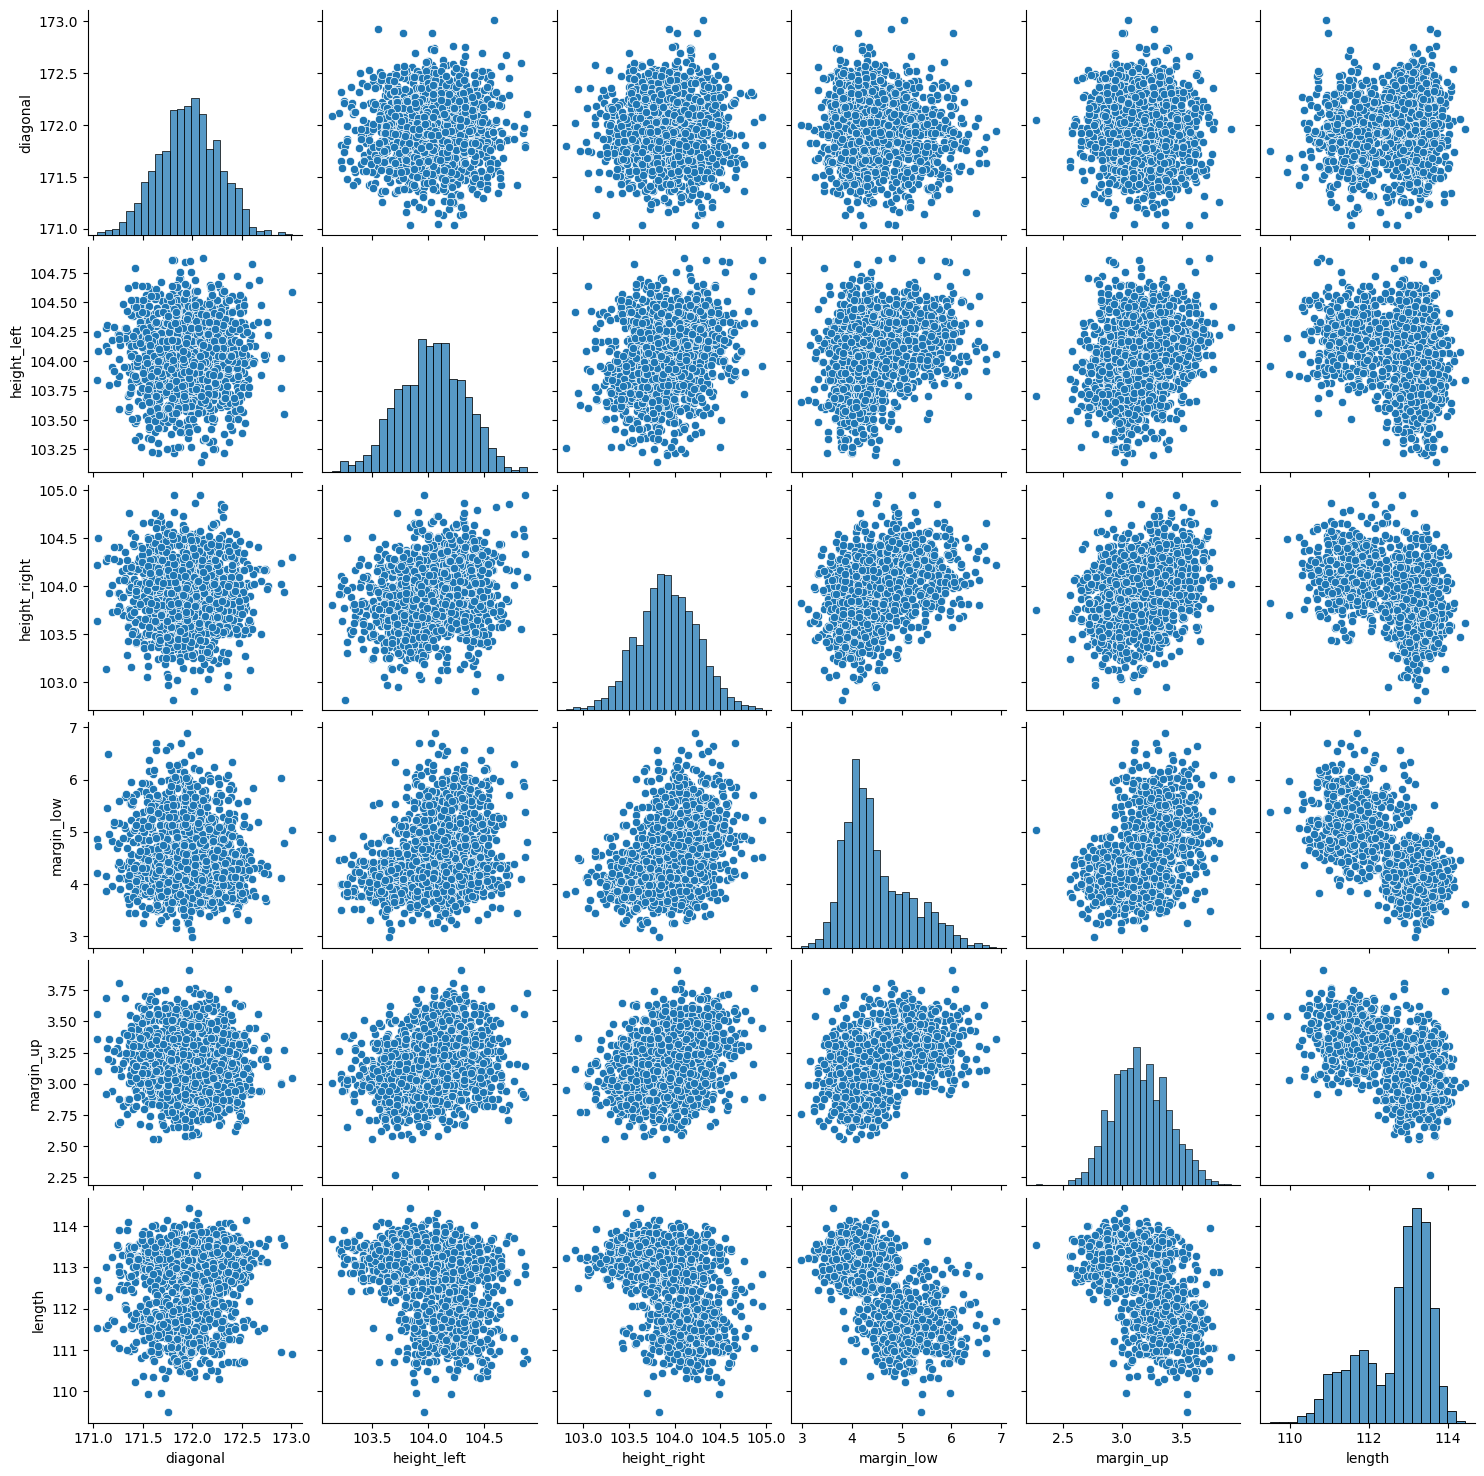

In [71]:
# vérification de la Linéarité
sns.pairplot(Les_billets.drop(columns=['is_genuine']))
plt.show()

In [72]:
# Ajout de la constante pour le modèle statsmodels
X = sm.add_constant(X)

In [73]:
# Ajuster le modèle
model= sm.OLS(y, X).fit()

In [74]:
# Afficher les résultats du modèle
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     280.0
Date:                Fri, 09 Aug 2024   Prob (F-statistic):          1.65e-211
Time:                        22:54:17   Log-Likelihood:                -1007.9
No. Observations:                1500   AIC:                             2028.
Df Residuals:                    1494   BIC:                             2060.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.427      2.439   

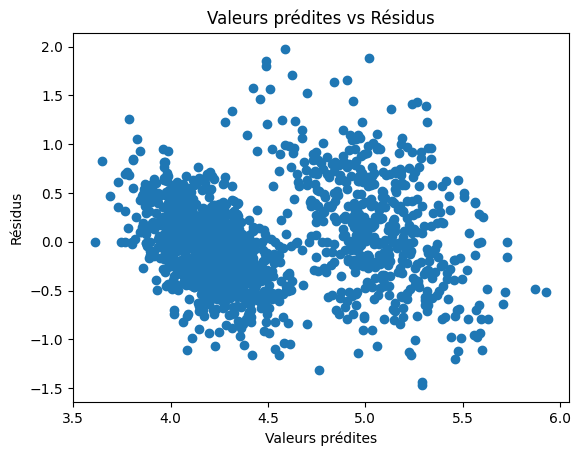

In [75]:
# Vérification de l'homoscedasticité
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Valeurs prédites vs Résidus')
plt.show()

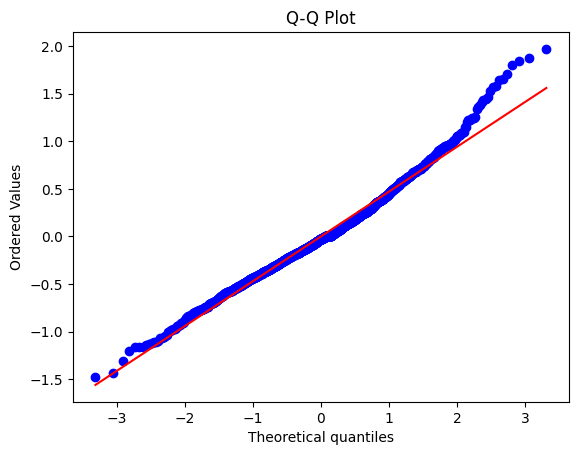

In [76]:
# Vérification de la normalité des erreurs
probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [77]:
# Vérification de l'indépendance des erreurs
durbin_watson_stat = durbin_watson(model.resid)
shapiro_test_stat, shapiro_p_value = shapiro(model.resid)

In [78]:
# Affichage des résultats des tests
print(f"Durbin-Watson statistic: {durbin_watson_stat}")
print(f"Shapiro-Wilk test statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")

Durbin-Watson statistic: 1.8863351916451971
Shapiro-Wilk test statistic: 0.9848127286868634, p-value: 1.845087893970966e-11


## 4-2: La régression logistique

In [79]:
# Assurer que la variable cible 'is_genuine' est bien de type binaire
Les_billets['is_genuine'] = Les_billets['is_genuine'].astype(int)

In [80]:
# Préparation des données
X = Les_billets.drop(columns=['is_genuine'])
y = Les_billets['is_genuine']

In [81]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [83]:
# Modèle de régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [84]:
# Prédictions
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

In [85]:
# Évaluation du modèle de régression logistique sur l'ensemble d'entraînement
conf_matrix_train_log_reg = confusion_matrix(y_train, y_train_pred_log_reg)
accuracy_train_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
TN_train_log_reg, FP_train_log_reg, FN_train_log_reg, TP_train_log_reg = conf_matrix_train_log_reg.ravel()

In [86]:
# Évaluation du modèle de régression logistique sur l'ensemble de test
conf_matrix_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
accuracy_test_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
TN_test_log_reg, FP_test_log_reg, FN_test_log_reg, TP_test_log_reg = conf_matrix_test_log_reg.ravel()

In [87]:
print(f"\nModèle de Régression Logistique - Ensemble de test:\n")
print(f"Confusion Matrix:\n{conf_matrix_test_log_reg}")
print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred_log_reg)}")
print(f"Accuracy: {accuracy_test_log_reg * 100:.2f}%")
print(f"Vrais Positifs (VP): {TP_test_log_reg}")
print(f"Vrais Négatifs (VN): {TN_test_log_reg}")
print(f"Faux Positifs (FP): {FP_test_log_reg}")
print(f"Faux Négatifs (FN): {FN_test_log_reg}")


Modèle de Régression Logistique - Ensemble de test:

Confusion Matrix:
[[108   2]
 [  0 190]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 99.33%
Vrais Positifs (VP): 190
Vrais Négatifs (VN): 108
Faux Positifs (FP): 2
Faux Négatifs (FN): 0


## 4-3: K_means

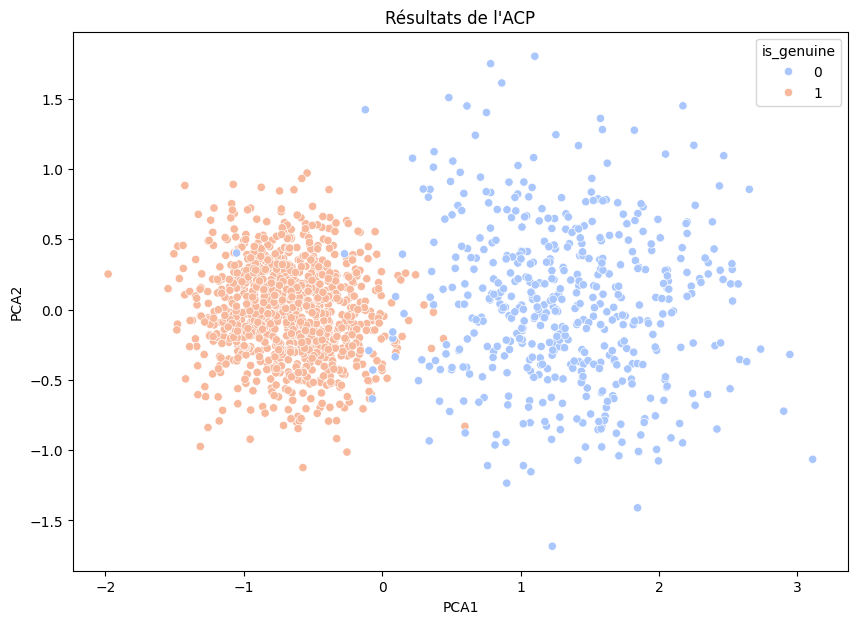

In [88]:
 # ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Les_billets.drop(columns=['is_genuine']))
Les_billets['PCA1'] = pca_result[:, 0]
Les_billets['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='is_genuine', data=Les_billets, palette='coolwarm')
plt.title('Résultats de l\'ACP')
plt.show()

In [89]:
# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

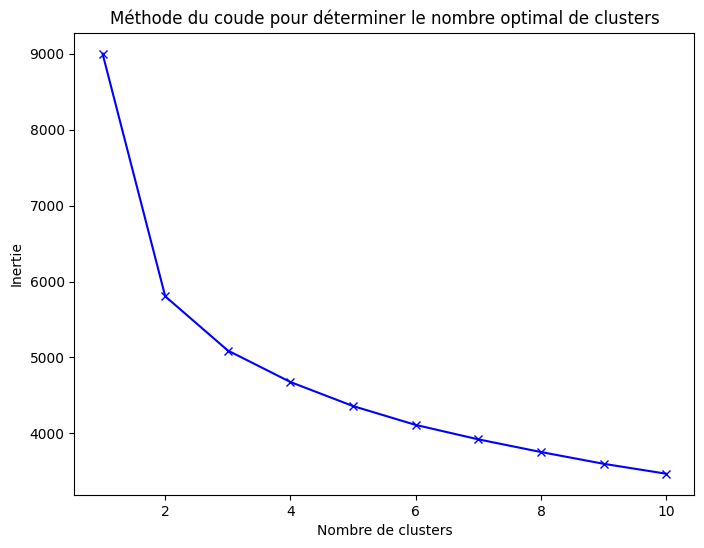

In [90]:
# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()


In [91]:
# Calculer le coefficient de silhouette pour différents nombres de clusters
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

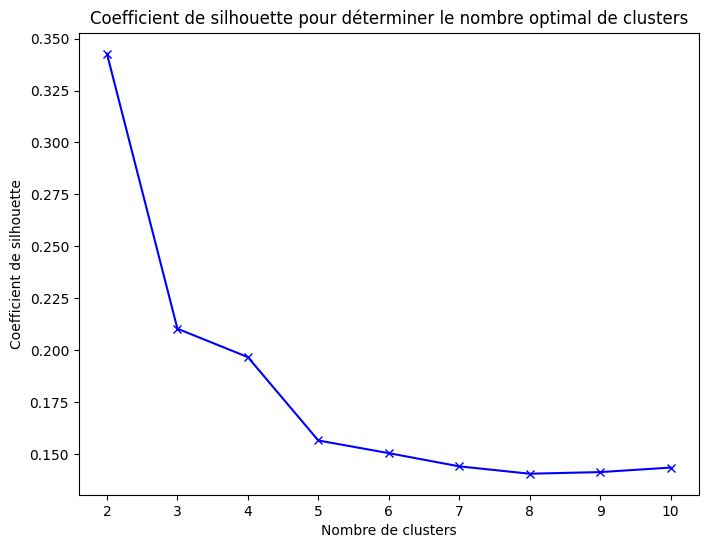

In [92]:
# Tracer le coefficient de silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Coefficient de silhouette pour déterminer le nombre optimal de clusters')
plt.show()

In [93]:
# Ajuster le modèle K-Means avec le nombre optimal de clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train)
y_train_pred_kmeans = kmeans.predict(X_train)
y_test_pred_kmeans = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
# Évaluation du modèle K-Means sur l'ensemble d'entraînement
conf_matrix_train_kmeans = confusion_matrix(y_train, y_train_pred_kmeans)
accuracy_train_kmeans = accuracy_score(y_train, y_train_pred_kmeans)
TN_train_kmeans, FP_train_kmeans, FN_train_kmeans, TP_train_kmeans = conf_matrix_train_kmeans.ravel()

In [95]:
# Évaluation du modèle K-Means sur l'ensemble de test
conf_matrix_test_kmeans = confusion_matrix(y_test, y_test_pred_kmeans)
accuracy_test_kmeans = accuracy_score(y_test, y_test_pred_kmeans)
TN_test_kmeans, FP_test_kmeans, FN_test_kmeans, TP_test_kmeans = conf_matrix_test_kmeans.ravel()

In [96]:
print(f"Modèle K-Means - Ensemble de test:\n")
print(f"Confusion Matrix:\n{conf_matrix_test_kmeans}")
print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred_kmeans)}")
print(f"Accuracy: {accuracy_test_kmeans * 100:.2f}%")
print(f"Vrais Positifs (VP): {TP_test_kmeans}")
print(f"Vrais Négatifs (VN): {TN_test_kmeans}")
print(f"Faux Positifs (FP): {FP_test_kmeans}")
print(f"Faux Négatifs (FN): {FN_test_kmeans}")

Modèle K-Means - Ensemble de test:

Confusion Matrix:
[[109   1]
 [  2 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Accuracy: 99.00%
Vrais Positifs (VP): 188
Vrais Négatifs (VN): 109
Faux Positifs (FP): 1
Faux Négatifs (FN): 2


## 4-4: Meilleur Modèle de prédiction

In [97]:
# Sélectionner le meilleur modèle
if accuracy_test_log_reg > accuracy_test_kmeans:
    best_model = log_reg
    best_model_name = "Régression Logistique"
else:
    best_model = kmeans
    best_model_name = "K-Means"

print(f"Le meilleur modèle est: {best_model_name}")

Le meilleur modèle est: Régression Logistique


### Prédire des nouvelles données

In [98]:
# Chargement de fichier
Les_billets_production = pd.read_csv('billets_production.csv')

In [99]:
# regarder le fichier
Les_billets_production.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [100]:
# Normaliser les nouvelles données
new_data_features =Les_billets_production.drop(columns=['id'])
new_data_scaled = scaler.transform(new_data_features)

In [101]:
# Prédictions avec le modèle de régression logistique
log_reg_predictions = log_reg.predict(new_data_scaled)

In [102]:
# Prédictions avec le modèle K-Means
kmeans_predictions = kmeans.predict(new_data_scaled)

In [103]:
# Résultats
results = pd.DataFrame({
    'id': Les_billets_production['id'],
    'Logistic Regression Prediction': log_reg_predictions,
    'KMeans Prediction': kmeans_predictions
})

print(f"Prédictions pour les nouvelles données avec les deux modèles:")
print(results)

Prédictions pour les nouvelles données avec les deux modèles:
    id  Logistic Regression Prediction  KMeans Prediction
0  A_1                               0                  0
1  A_2                               0                  0
2  A_3                               0                  0
3  A_4                               1                  1
4  A_5                               1                  1


In [104]:
# Mapping des valeurs 0/1 en "Faux"/"Vrai"
def map_predictions(prediction):
    return "Vrai" if prediction == 1 else "Faux"

# Appliquer le mapping aux prédictions
results = pd.DataFrame({
    'id': Les_billets_production['id'],
    'Logistic Regression Prediction': [map_predictions(pred) for pred in log_reg_predictions],
    'KMeans Prediction': [map_predictions(pred) for pred in kmeans_predictions]
})

print(f"Prédictions pour les nouvelles données avec les deux modèles:")
print(results)

Prédictions pour les nouvelles données avec les deux modèles:
    id Logistic Regression Prediction KMeans Prediction
0  A_1                           Faux              Faux
1  A_2                           Faux              Faux
2  A_3                           Faux              Faux
3  A_4                           Vrai              Vrai
4  A_5                           Vrai              Vrai
